    QUERY DB
1 - connect to mongoDB

2 - display DBs

3 - query db choice

4 - return selection

    QUERY COLLECTION
1 - database = query_db 
    db = client.databse
2 - list collections

3 - query which collection to load

4 - display contents of selected collection(s)

5 - return selection

    QUERY DOCUMENTS
for now just load ALL documents returned as list
then get to loading selected docs / chosen fields in the documents

    FINAL DATA PULL 
takes place after all data has been queried
class:
    q_db = query_db
    q_coll = query_coll
    q_doc = query_doc
    return doc_list
    

    PLOTTING
take list of documents, make into DF

set x-values and y-values, plot

    SAVING DATAFRAME
query db
query collection
query documents (all)

save as json

Slim down imports by finding out just what you need to import for usage.

# Considerations:

- Add back feature to methods after db query
    here are docs/colls found - load docs/colls?
    if yes: load | no: relauch previous method with already input information?
    
   

In [1]:
import os
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\Alec\\Documents\\Programming_Resources\\Boot_Camp\\repos\\jj_earnings_tracker'

In [2]:
# set up pymongo connection

# https://docs.mongodb.com/manual/reference/default-mongodb-port/

conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [20]:
#-------------------------------------------------------------------------------------------------------------------------#
# https://www.w3schools.com/python/python_mongodb_query.asp

def query_database():
    # pull number of elements in list, display for user, request name of DB to pull
    # return the input, db_query = string dtype
    
    dblist = client.list_database_names()

    list_len = len(dblist)
    print(f'{list_len} Databases Found ... ')
    print()
    for name in dblist:
        print(f'-{name}')
        print()
    print('------------------------')

    database_query = input("Which Database would you like to load? Use exact spelling.. ")
    if database_query not in dblist:
        raise ValueError(f'Database "{database_query}" Not Found.')
    else:
        print()
        print(f'Database "{database_query}" Successfully Loaded..')
        print()
        return database_query
    
#-------------------------------------------------------------------------------------------------------------------------#

def query_collections(database_query):
    # list all collections in DB
    # request db to display collections
    # return string of which collection user selected to view documents
    
    #### add back feature to method?
    
#     database = query_database()
    loop = True
    collection_list = client[database_query].list_collection_names()
    collection_dict = {}
    x = len(collection_list)
   
    
    print(f' {x} collection(s) found in "{database_query}"')
    print('------------------------')
    # print each collection in list i.e. DB
    for count, collection in enumerate(collection_list):
        
        collection_dict[f'{collection}'] = count
        
        print()
        print(f'{count}-{collection}')
        print()
    print('------------------------')    
    print()
    
   # keep asking the query if the user misspells the collection

    while loop == True:
        try:
            collection_query = input("Which collection would you like to load? ")

            if collection_query not in collection_list:
                raise ValueError("Collection not found, Try again.")
                
            else:
                print("Collection found, Displaying Documents.")
                loop = False
                return collection_query
                

        except ValueError:
            print()
            print(f'Collection "{collection_query}" not found, Try again.')
            print()
#-------------------------------------------------------------------------------------------------------------------------#

def query_documents(database_query,collection_query):

    collection = client[database_query][collection_query]   
    
    documents = collection.find()

    doc_list = []
    for doc in documents:
        doc_list.append(doc)
    return doc_list

#-------------------------------------------------------------------------------------------------------------------------#

def plot_earnings(dataframe):
    # set up plot(s)
    fig = plt.figure(figsize = (19.20,10.80))

    # ------------------------------------ JJ wage ------------------------------------ #

    # set x & y values
    x_date = dataframe['date_of_shift']
    y_jj_earnings = dataframe['earnings']

    plt.plot(x_date,y_jj_earnings \
             ,label = "Jimmy John's Earnings"
             ,marker = "o"
             ,color = "b"
            )


    # ------------------------------------ Chipotle wage ------------------------------------ #

    y_chipotle_earnings = dataframe['old_job_earnings']


    plt.plot(x_date, y_chipotle_earnings \
             ,label='Chipotle Earnings'
             ,marker='o'
             ,color='r'
             ,linestyle='--'
            )

    # ------------------------------------ Display Plot(s) ------------------------------------ #
    plt.title('Earnings per Shift')
    plt.xlabel('Date of Shift')
    plt.ylabel('Earnings in $USD')
    plt.legend()
    plt.plot()
    plt.grid(True)
    plt.savefig('JJ_vs_Chipotle_Earnings.png')
    plt.show()

#-------------------------------------------------------------------------------------------------------------------------#

def display_and_save(name):
 
    dataframe.to_json(f'{name}.json',)
    print("Saving Dataframe to JSON file ... ")
    print()
    return dataframe

#-------------------------------------------------------------------------------------------------------------------------#

In [21]:
database_query = query_database()
collection_query = query_collections(database_query)
documents = query_documents(database_query,collection_query)
documents

7 Databases Found ... 

-CAD_search_results

-admin

-commerce_db

-config

-jj_earnings

-local

-mars_app

------------------------
Which Database would you like to load? Use exact spelling.. jj_earnings

Database "jj_earnings" Successfully Loaded..

 2 collection(s) found in "jj_earnings"
------------------------

0-shifts


1-test

------------------------

Which collection would you like to load? shifts
Collection found, Displaying Documents.


[{'_id': ObjectId('61d91ad96ff8d725c83e3302'),
  'date_of_shift': '12-31-21',
  'tips': 41.0,
  'hours': 7.75,
  'earnings': 114.62,
  'effective_wage': 14.79,
  'old_job_earnings': 127.88,
  'old_job_comparison': 13.25,
  'starting_mileage': 0,
  'ending_mileage': 0,
  'change_in_mileage': 0},
 {'_id': ObjectId('61d91ad96ff8d725c83e3303'),
  'date_of_shift': '01-01-22',
  'tips': 45.0,
  'hours': 6.0,
  'earnings': 102.0,
  'effective_wage': 17.0,
  'old_job_earnings': 99.0,
  'old_job_comparison': -3.0,
  'starting_mileage': 0,
  'ending_mileage': 0,
  'change_in_mileage': 0},
 {'_id': ObjectId('61d91ad96ff8d725c83e3304'),
  'date_of_shift': '01-02-22',
  'tips': 71.0,
  'hours': 10.2,
  'earnings': 167.9,
  'effective_wage': 16.46,
  'old_job_earnings': 168.3,
  'old_job_comparison': 0.4,
  'starting_mileage': 0,
  'ending_mileage': 0,
  'change_in_mileage': 0},
 {'_id': ObjectId('61d91ad96ff8d725c83e3305'),
  'date_of_shift': '01-05-22',
  'tips': 71.0,
  'hours': 7.0,
  'earnings'

In [22]:
# create dataframe from the documents, drop columns
dataframe = pd.DataFrame(documents)
# drop _id from dataframe
dataframe = dataframe.drop(columns=['_id'])

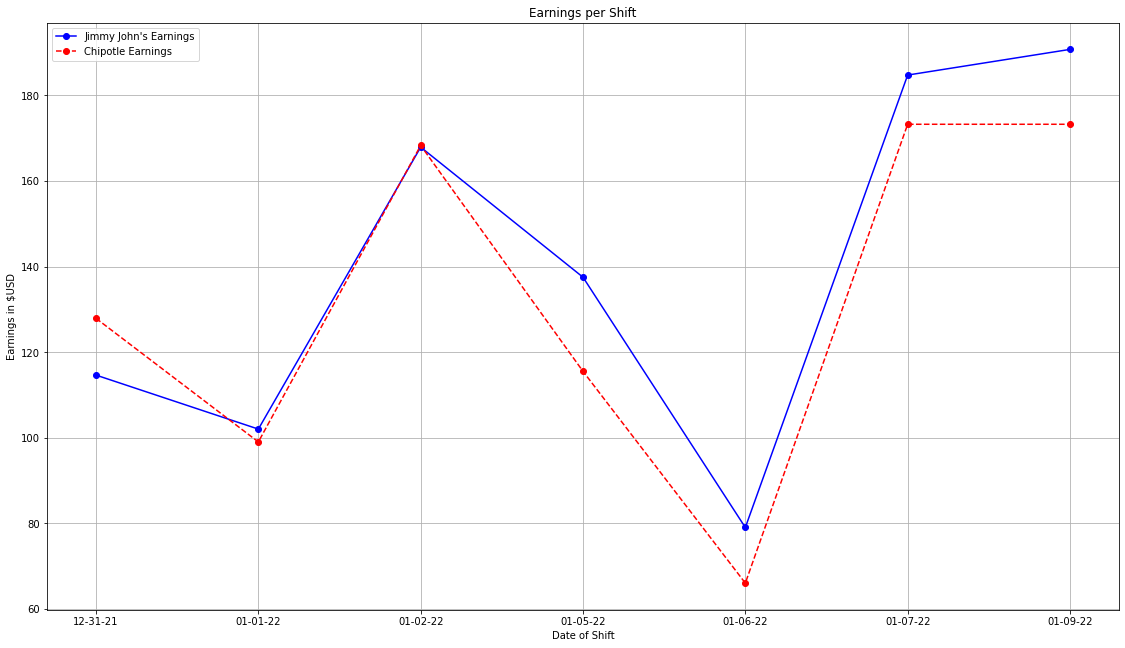

In [23]:
plot_earnings(dataframe)

In [15]:
display_and_save('jj_earnings')

Saving Dataframe to JSON file ... 



,date_of_shift,tips,hours,earnings,effective_wage,old_job_earnings,old_job_comparison,starting_mileage,ending_mileage,change_in_mileage
0,12-31-21,41.0,7.75,114.62,14.79,127.88,13.25,0,0,0
1,01-01-22,45.0,6.00,102.00,17.00,99.00,-3.00,0,0,0
2,01-02-22,71.0,10.20,167.90,16.46,168.30,0.40,0,0,0
3,01-05-22,71.0,7.00,137.50,19.64,115.50,-22.00,75190,75245,55
4,01-06-22,41.0,4.00,79.00,19.75,66.00,-13.00,75255,75290,35
5,01-07-22,85.0,10.50,184.75,17.60,173.25,-11.50,75300,75369,69
6,01-09-22,91.0,10.50,190.75,18.17,173.25,-17.50,75382,75444,62
